---
title: "선형회귀분석의 시작 | `LinearRegression()`"
author: "강신성"
date: "2023-10-19"
date-format: iso
categories: [python, Linear]
---




> `sklearn`의 `linear_mode.LinearRegression()`을 사용하여 선형회귀분석을 해보자!

## 1. 라이브러리 imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

## 2. Data

> 전주시의 기온 자료

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()   ## 자료를 크기 순서대로 정렬, sort_values()와 비슷하달까...


In [3]:
temp

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

\- 아래와 같은 모형을 가정하자.
$$\textup{아이스크림 판매량}= 20 ＋ \textup{온도} × 2.5 × \textup{오차(운)}$$

* 더미 모형 생성

In [4]:
np.random.seed(43052)
eps = np.random.randn(100)*3  ## 오차
icecream_sales = 20 + temp * 2.5 + eps

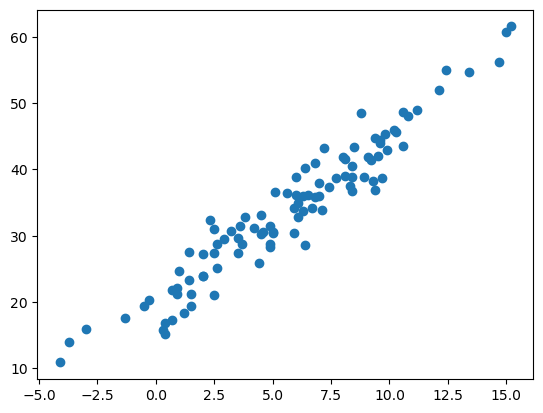

In [5]:
plt.plot(temp, icecream_sales, 'o')
plt.show()

> 상기 결과를 관측했다고 생각합시다.

In [6]:
df = pd.DataFrame({'temp' : temp, 'sales' : icecream_sales})
df

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


## 3. 게임세팅

\- 편의상 아래와 같은 기호를 도입하자.

-   (`df.temp[0]`, `df.temp[1]`, … , `df.temp[99]`) =
    $(x_1,x_2,\dots,x_{100})=(-4.1,-3.7,\dots,15.2)$
-   (`df.sales[0]`, `df.sales[1]`, … , `df.sales[99]`) =
    $(y_1,y_2,\dots,y_{100})=(10.90,14.00, \dots,61.56)$

> 이 자료 $\big\{(x_i,y_i)\big\}_{i=1}^{100}$를 바탕으로 어떠한 **패턴**을 발견하여 새로운 $x$에 대한 예측값을 알고 싶다 : $\hat{y}$

**A. 질문**

\-  기온이 $x = -2.0$일 때, 아이스크림을 얼마정도 판다고 보는 게 타당할까?

**B. 답 1**

\- $x = -2.0$ 근처의 데이터를 살펴보자.

In [7]:
df[(-4.0 < df.temp) & (0.0 > df.temp)]

,temp,sales
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
5,-0.3,20.317853


> $-1.3$이 제일 가까운데, 대충 $17.67$ 언저리 아닐까...?

### **A. 산점도와 추세선**
---




\- 자료를 바탕으로 그림을 그려보자

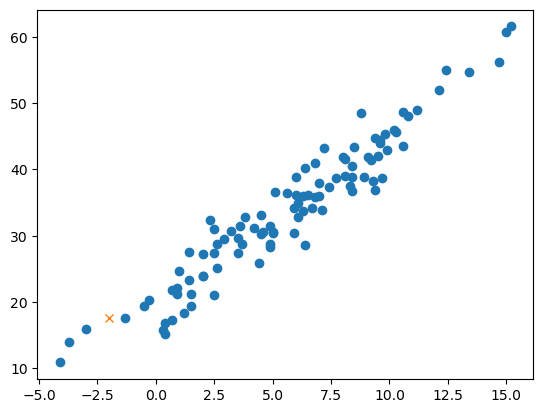

In [8]:
plt.plot(df.temp, df.sales, 'o')
plt.plot([-2.0],[17.67],'x')     # 이미 들어가있는 플롯에 점을 하나 찍는다. 마커는 X

plt.show()

> 예상한 것(17.67)보다 못팔 것 같은데...?

### **B. 아이디어**
---




\- 선을 기가 막히게 그어서 추세선을 만들고, 그 추세선 위의 점으로 예측하자!~(사실 모형을 우리가 만들었으니 이미 추세선을 알고 있긴 함)~

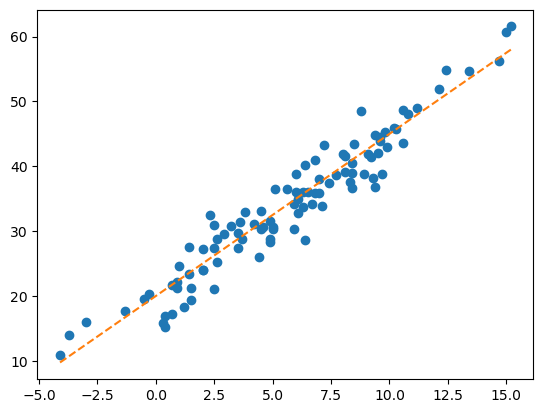

In [9]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.temp, 20+df.temp*2.5, '--')  ## 위에서 직접 설정했던 자료의 관계, 절편이 20이고 기울기가 2.5

plt.show()

\- 사실 $y = 20 + 2.5x$라는 추세선을 이미 알고 있었음.

\- 그래서 $x = -2$라면 $y = 20 - 2.5 × 2 = 15$라고 보는 게 합리적임(오차를 고려 안하면)

> 허나, 실제 상황에서 우리는 $20, 2.5$라는 숫자를 모른다.

\- **게임셋팅**
* 원래 게임 : 임의의 $x$에 대하여 합리적인 $y$를 잘 찾는 게임
* 변형된 게임 : $20, 2.5$라는 숫자를 잘 찾는 게임. 즉, 데이처를 보고 최대한 $y_i \approx ax_i+b$가 되도록 $a, b$를 잘 선택하는 게임

## 4. 분석

> 그렇다면 늘 했던 것처럼 네 단계로 분석을 해보자.

### **A. 데이터**
---




In [10]:
# step 1 -- data
train = pd.DataFrame({'temp' : temp, 'sales' : icecream_sales})

X = train[['temp']]
y = train['sales']

> 데이터를 학습해서 추세선을 적절히 그릴 수 있고, 그려진 추세선으로 예측까지 해줄 수 있는 아이(predictor)를 만들자.~(근데 이정도면 학생이 아니라 노예...)~

### **B. predictor**
---




In [11]:
# step 2
predictr = sklearn.linear_model.LinearRegression()

> `sklearn`의 `linear_model.LinearRegression()`을 사용했다. 이러면 가장 기본적인 선형회귀를 진행한다.(LSE를 쓰는 그거 있잖아...)

### **C. 학습**
---




In [12]:
# step 3
predictr.fit(X, y)

LinearRegression()

> 학생이 train을 완료했다.

### **D. 예측(predict)**
---




\- 학생(predictr) : 데이터를 살펴보니 True는 이럴 것 같아요.

In [13]:
y_hat = predictr.predict(X)  ## X값에 해당하는 y_hat값을 예측하여 산출.

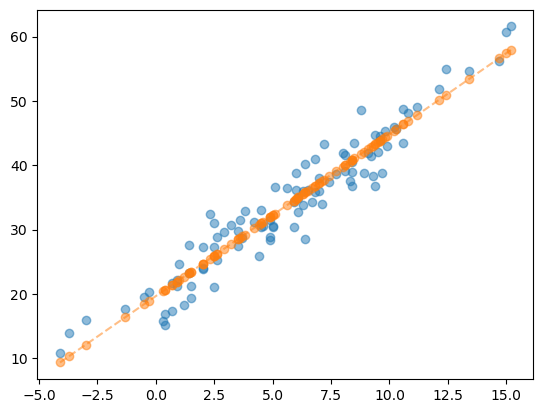

In [14]:
plt.plot(X, y, 'o', alpha = 0.5)
plt.plot(X, y_hat, 'o--', alpha = 0.5)

plt.show()

\- 그럼 기울기와 절편은 어디에 저장된 걸까?

\- predictr : 여깄음.

In [16]:
(predictr.coef_, predictr.intercept_)

(array([2.51561216]), 19.66713126947925)

\- 새로운 데이터 $x = -2$에 대한 예측

In [19]:
float(predictr.coef_)*(-2) + float(predictr.intercept_)

14.63590694951262

> 해당 결과값을 그래프에 나타내면...

In [26]:
X_input = pd.DataFrame({'temp' : [-2.0]})

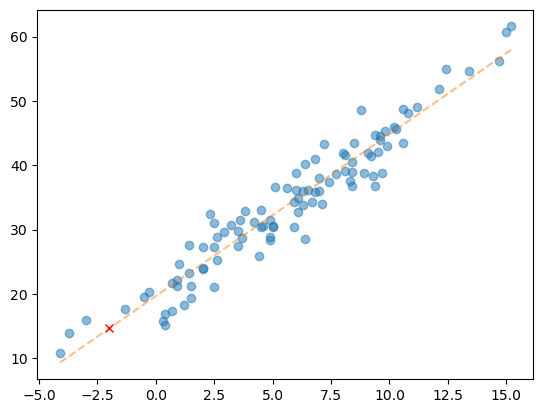

In [27]:
plt.plot(X, y, 'o', alpha = 0.5)
plt.plot(X, y_hat, '--', alpha = 0.5)
plt.plot(X_input, predictr.predict(X_input), 'xr')  ## 원래는 리스트나 어레이로 넣어주는 게 정배긴 함

plt.show()

> 예측값이 직선상에 위치함을 알 수 있다.

## 5. 두 타입의 아이스크림(초코 / 바닐라)에 대한 회귀분석

> 이전의 기온 자료를 바꿔 아래와 같은 모형을 가정해보자.

### **A. Data**
---




In [28]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()   ## 자료를 크기 순서대로 정렬
temp  ## 전주시의 기온 100개 자료

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

\- 아래와 같은 모형을 가정하자.

$$\textup{초코 아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

$$\textup{바닐라 아이스크림 판매량} = 40 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [44]:
np.random.seed(43052)
choco = 20 + temp*2.5 + np.random.randn(100)*3  ## random normal distribution
vanilla = 40 + temp*2.5 + np.random.randn(100)*3

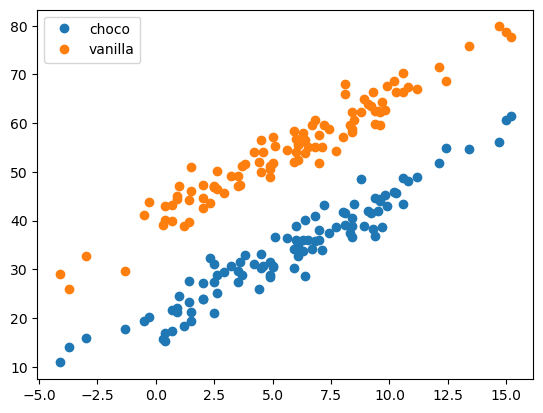

In [45]:
plt.plot(temp, choco, 'o', label = 'choco')
plt.plot(temp, vanilla, 'o', label = 'vanilla')
plt.legend()
plt.show()

> 우리는 위와 같은 정보를 관측했다고 가정하자.

In [47]:
df1 = pd.DataFrame({'temp' : temp, 'type' : ['choco' for i in range(100)], 'sales' : choco})
df2 = pd.DataFrame({'temp' : temp, 'type' : ['vanilla' for i in range(100)], 'sales' : vanilla})

df = pd.concat([df1, df2], axis = 0).reset_index(drop = True)
df

,temp,type,sales
0,-4.1,choco,10.900261
1,-3.7,choco,14.002524
2,-3.0,choco,15.928335
3,-1.3,choco,17.673681
4,-0.5,choco,19.463362
...,...,...,...
195,12.4,vanilla,68.708075
196,13.4,vanilla,75.800464
197,14.7,vanilla,79.846568
198,15.0,vanilla,78.713140


### **B. 분석**
---




\- 언제처럼 늘 그랬던 것처럼...

In [70]:
# step 1
## X = pd.get_dummies(df).drop(['sales'], axis = 1) ## 이게 제일 범용적이긴 함
X = df.loc[:, ['temp', 'type']].assign(type = (df.type == 'choco')) ## 직관적으로 쓴 코드, 범주형은 인식을 못한다.
y = df['sales']

# step 2
predictr = sklearn.linear_model.LinearRegression()

# step 3
predictr.fit(X, y)

# step 4
df = df.assign(sales_hat = predictr.predict(X));df

,temp,type,sales,sales_hat
0,-4.1,choco,10.900261,9.286731
1,-3.7,choco,14.002524,10.295689
2,-3.0,choco,15.928335,12.061366
3,-1.3,choco,17.673681,16.349439
4,-0.5,choco,19.463362,18.367355
...,...,...,...,...
195,12.4,vanilla,68.708075,71.446479
196,13.4,vanilla,75.800464,73.968875
197,14.7,vanilla,79.846568,77.247989
198,15.0,vanilla,78.713140,78.004708


\- 가장 중요한 시각화까지...

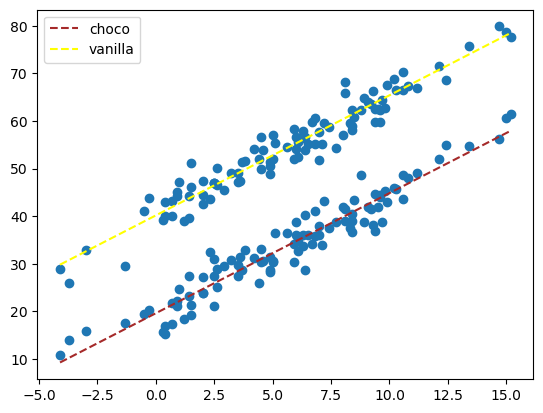

In [74]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.loc[df.type == 'choco'].temp, df.loc[df.type == 'choco'].sales_hat, '--', color = 'brown', label = 'choco')
plt.plot(df.loc[df.type == 'vanilla'].temp, df.loc[df.type == 'vanilla'].sales_hat, '--', color = 'yellow', label = 'vanilla')
plt.legend()
plt.show()

> 별다른 뜻 없이 (초코, 바닐라)에 (1, 0)을 넣었는데, 어떻게 뭐가 나오긴 했다.

> **어케했음???**

$$\textup{아이스크림 판매량} = 40 + \textup{아이스크림종류} \times (-20) + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [72]:
predictr.coef_, predictr.intercept_

(array([  2.52239574, -20.54021854]), 40.16877158069265)

> coef_(기울기)가 2개지요.

온도와 범주형 자료인 아이스크림 종류에 따라 기울기가 다르다. 온도 1도가 변할때마다 판매량은 2.52239574가 변하고, 아이스크림 종류가 1 변할때마다(0에서 1이니까 바닐라에서 초코로 바뀜) -20.54를 곱한 수를 더하여 수식을 설명하였다.

**예측**

\- 온도가 $-2$이고, `type`이 `vanilla(0)`라면 예측값은?

In [76]:
Xnew = pd.DataFrame({'temp' : [-2], 'type' : [0]})

predictr.predict(Xnew)

array([35.1239801])

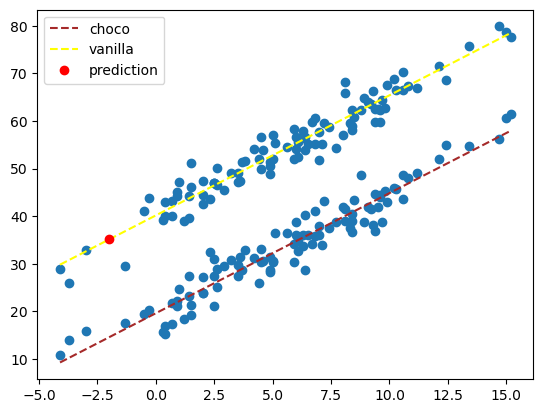

In [77]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.loc[df.type == 'choco'].temp, df.loc[df.type == 'choco'].sales_hat, '--', color = 'brown', label = 'choco')
plt.plot(df.loc[df.type == 'vanilla'].temp, df.loc[df.type == 'vanilla'].sales_hat, '--', color = 'yellow', label = 'vanilla')
plt.plot(Xnew.temp, predictr.predict(Xnew), 'or', label = 'prediction')
plt.legend()
plt.show()

### **C. 데이터 전처리**
---




\- 아까 `pd.get_dummies()`를 잠시 본 것 같은데, 이걸 어떻게, 왜 써야 하는 지 알아보자.

In [78]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

In [79]:
X = pd.get_dummies(X);X

,temp,type_choco,type_vanilla
0,-4.1,True,False
1,-3.7,True,False
2,-3.0,True,False
3,-1.3,True,False
4,-0.5,True,False
...,...,...,...
195,12.4,False,True
196,13.4,False,True
197,14.7,False,True
198,15.0,False,True


> 원-핫 인코딩 : 표현하고 싶은 단어에는 1을, 그것이 아닌 것에는 0을 부여

\- LinearRegression 모델의 경우 범주형 자료를 자동으로 인식하지 못한다. 따라서 구분할 범주형 변수가 많다면, pd.get_dummies()를 통해 범주를 나눠주어야 한다.

### **D. 모형의 평가**
---




\- 단순선형회귀분석의 경우 모형을 $R^2$(결정계수)로 평가한다.

> 다만 이것이 높다고 해서 무조건적으로 좋은 건 아니고, 명확한 기준도 없다. 모형 간 상대적인 좋음을 비교하는 것 뿐이다.

\- LogisticRegression에서는 적중률로 딱 떨어지게 점수를 내줄 수 있겠지만, 이건 그렇게 해버리면 0점이 나와버리겠지...

## 6. 설명변수가 많을 때

\- kaggle에서 "Medical Cose Personal Datasets"을 다운로드

> https://www.kaggle.com/datasets/mirichoi0218/insurance

In [82]:
df = pd.read_csv(".\data\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **A. 분석**
---




> 열 이름을 먼저 알아보자.

In [84]:
set(df.columns)

{'age', 'bmi', 'charges', 'children', 'region', 'sex', 'smoker'}

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


\- 대충 여러가지 범주형ㆍ연속형 설명변수들과 보험료의 관계를 요약하고 싶다고 하자.

> 먼저 범주형 자료(`sex`, `smoker`, `region`)들을 원-핫 인코딩 해주자.

In [93]:
X = pd.get_dummies(df.drop(['charges'], axis = 1))
y = df.charges

X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


\- 그럼 뭐 늘 하던대로...

In [94]:
# 2
predictr = sklearn.linear_model.LinearRegression()

# 3
predictr.fit(X, y)

# 4
df = df.assign(y_hat = predictr.predict(X))

In [95]:
df

,age,sex,bmi,children,smoker,region,charges,y_hat
0,19,female,27.900,0,yes,southwest,16884.92400,25293.713028
1,18,male,33.770,1,no,southeast,1725.55230,3448.602834
2,28,male,33.000,3,no,southeast,4449.46200,6706.988491
3,33,male,22.705,0,no,northwest,21984.47061,3754.830163
4,32,male,28.880,0,no,northwest,3866.85520,5592.493386
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,12351.323686
1334,18,female,31.920,0,no,northeast,2205.98080,3511.930809
1335,18,female,36.850,0,no,southeast,1629.83350,4149.132486
1336,21,female,25.800,0,no,southwest,2007.94500,1246.584939


\- `charge`와 `y_hat`이 잘 안맞는 것 같은데...?

### **B. 평가**
---




In [97]:
predictr.score(X, y)

0.7509130345985205

> $R^2 = \frac{SSR}{SST} = 0.7509130345985205$
>
> 0.7 이상이면 망한 모형까진 아니지만...

**계수 해석**

\- 상수항

In [98]:
predictr.intercept_

-666.9377199366372

> 기본적인 보험료(다른 모든 것이 0일 때)는 -666이다.~(딱봐도 이상하죠? 그래서 별로 의미는 없다.)~

\- 계수

In [101]:
pd.DataFrame({'columns' : X.columns, 'coef' : predictr.coef_})

,columns,coef
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_female,65.657180
4,sex_male,-65.657180
5,smoker_no,-11924.267271
6,smoker_yes,11924.267271
7,region_northeast,587.009235
8,region_northwest,234.045336
9,region_southeast,-448.012814


* 연속형 : 나이, bmi, 자녀의 수가 많을수록 보험료는 올라갔다.
* 범주형 : 여성, 흡연자의 경우 보험료가 더 비쌌다.
* 지역은 잘 모르겠으나, 나머지는 꽤 그럴듯해 보인다.(지역에 대한 정보는 알기 어려움...)